In [66]:
import pandas as pd

In [65]:
import numpy as np
import matplotlib as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('Diwali Sales Data.csv',encoding= 'unicode_escape')
#we use 'unicode_escape' to avoid encoding error 

In [4]:
df.shape


(11251, 15)

In [5]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [7]:
# to drop blank/unrealted column
df.drop(['Status','unnamed1'], axis=1, inplace=True)

In [8]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
#to drop null values,inplace will modify the current table itself and remove the null rows from the table 
df.dropna(inplace=True)

In [10]:
# change the data types of colmun
df['Amount']=df['Amount'].astype(int)

In [11]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [12]:
df[['Age','Amount','Orders']].describe()

,Age,Amount,Orders
count,11239.000000,11239.000000,11239.000000
mean,35.410357,9453.610553,2.489634
std,12.753866,5222.355168,1.114967
min,12.000000,188.000000,1.000000
25%,27.000000,5443.000000,2.000000
50%,33.000000,8109.000000,2.000000
75%,43.000000,12675.000000,3.000000
max,92.000000,23952.000000,4.000000


# Exploratory Data Analysis
Gender

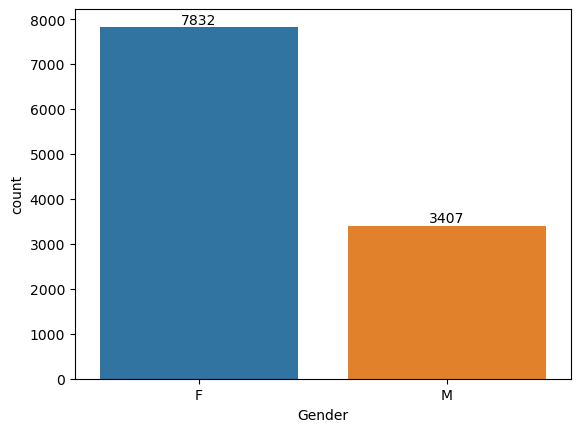

In [13]:
ax = sns.countplot(x = 'Gender',data=df)
# to label the graph data we use bar_label function
for i in ax.containers:
    ax.bar_label(i)

<Axes: xlabel='Gender', ylabel='Amount'>

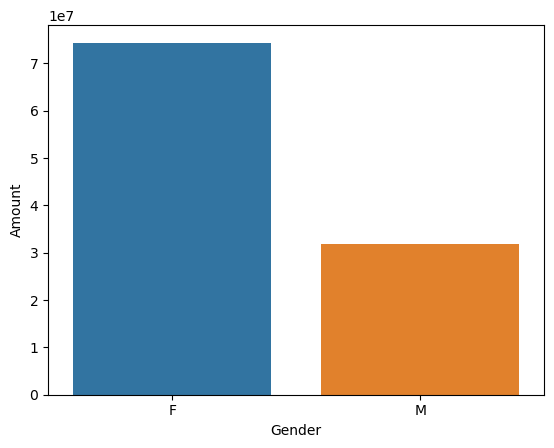

In [22]:
sales_gen = df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)    
sns.barplot(x='Gender',y='Amount',data = sales_gen)

From the graphs it is visible that most of the buyers are females and purchasing power is also greater.

 #Age

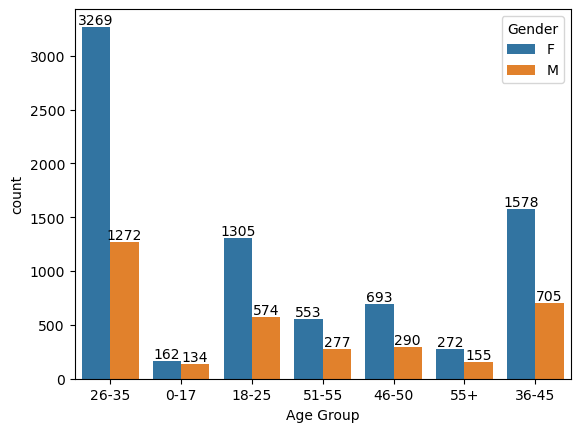

In [20]:
ax = sns.countplot(data = df,x = 'Age Group', hue = 'Gender')
for i in ax.containers:
    ax.bar_label(i)

<Axes: xlabel='Age Group', ylabel='Amount'>

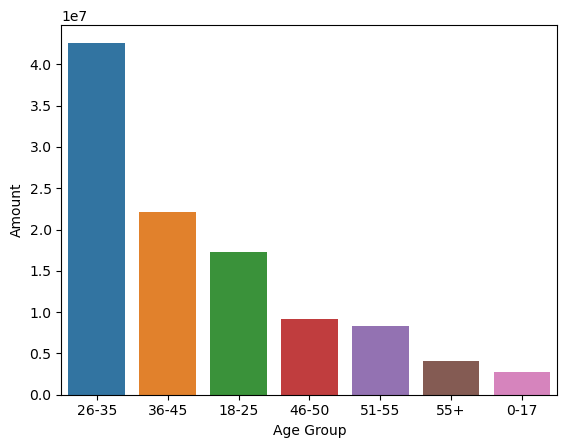

In [23]:
#Total amount vs Age group
sales_age = df.groupby(['Age Group'], as_index =False)['Amount'].sum().sort_values(by='Amount',ascending =False)
sns.barplot(x='Age Group',y = 'Amount',data=sales_age)

From Above graphs, most of the buyers are from the age of 26 to 35 and females are dominating


# State


<Axes: xlabel='State', ylabel='Orders'>

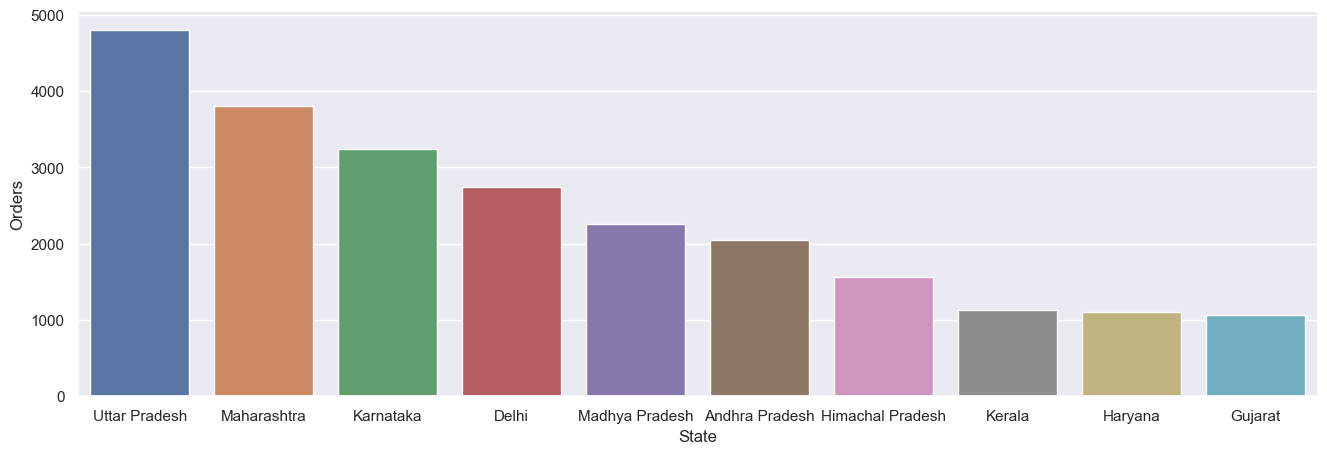

In [28]:
#Total number of orders from top 10 states

sales_state = df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)   
sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(data = sales_state, x='State',y ='Orders')

<Axes: xlabel='State', ylabel='Amount'>

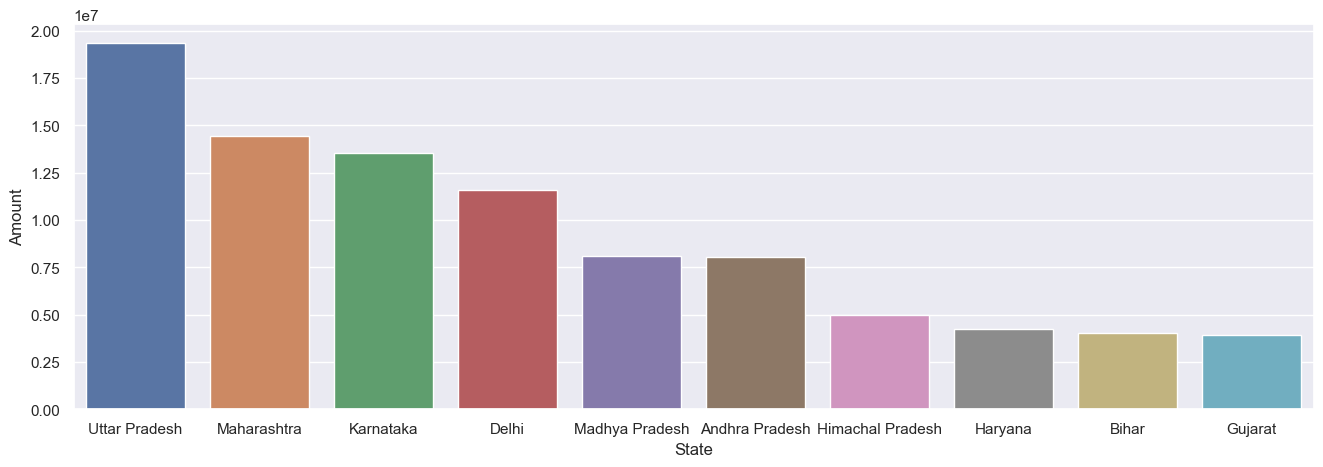

In [30]:
#Total amount/sales fromt top 10 states
sales_state = df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)   
sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(data = sales_state, x='State',y ='Amount')

From above graphs, we come to know that most order and amount are from UP, Maharashtra, Karnataka respectively.

# Marital Status

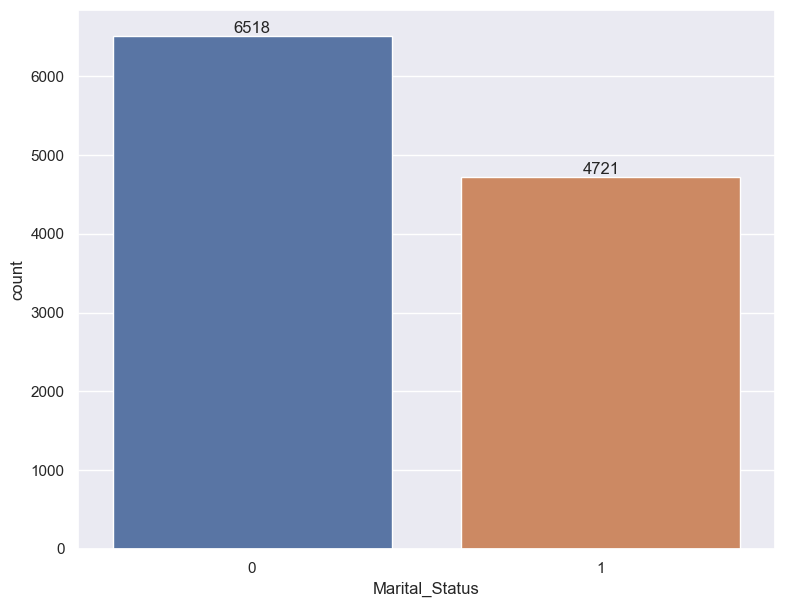

In [38]:
ax = sns.countplot(data=df,x='Marital_Status')
sns.set(rc={'figure.figsize': (5,7)}) # it is used to determine width and height of graph
for i in ax.containers:
    ax.bar_label(i)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

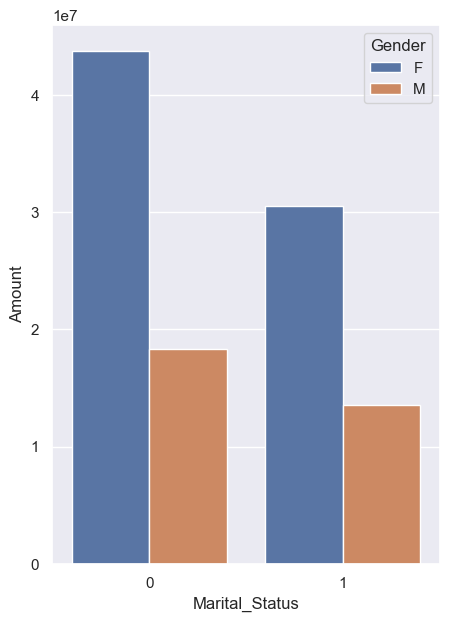

In [39]:
sales_state = df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)   

sns.barplot(data = sales_state, x='Marital_Status',y ='Amount',hue='Gender')

From above graphs we can observe that married women have spend most amount and have high purchasing power

# Occupation

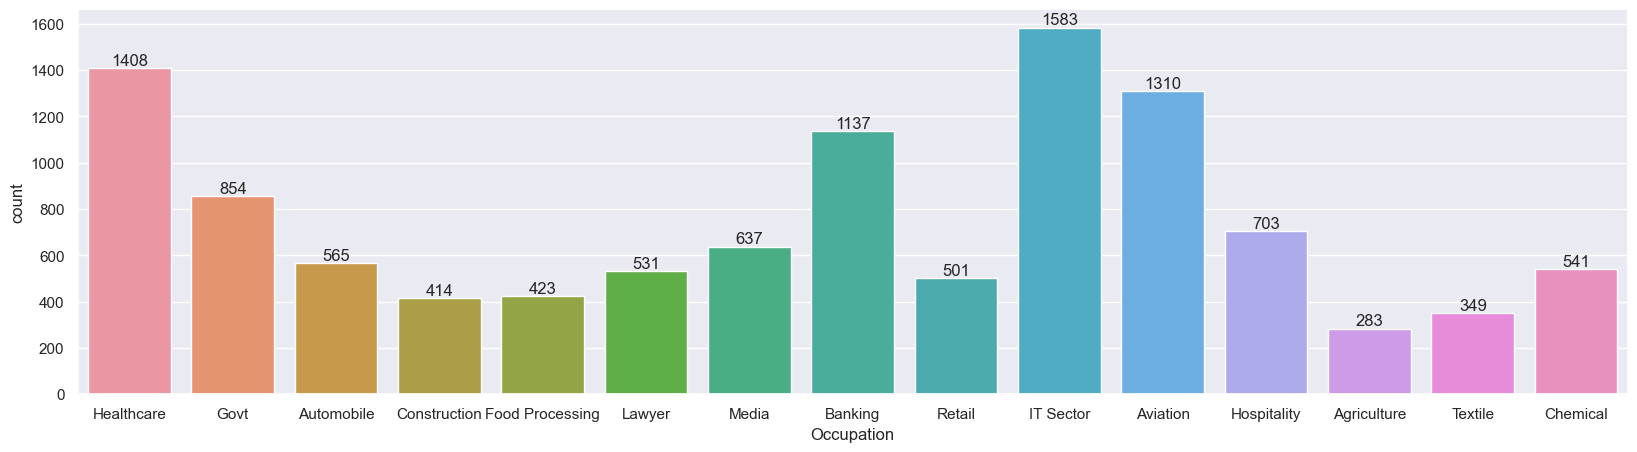

In [41]:
ax = sns.countplot(data=df,x='Occupation')
sns.set(rc={'figure.figsize': (20,5)}) # it is used to determine width and height of graph
for i in ax.containers:
    
    ax.bar_label(i)

<Axes: xlabel='Occupation', ylabel='Amount'>

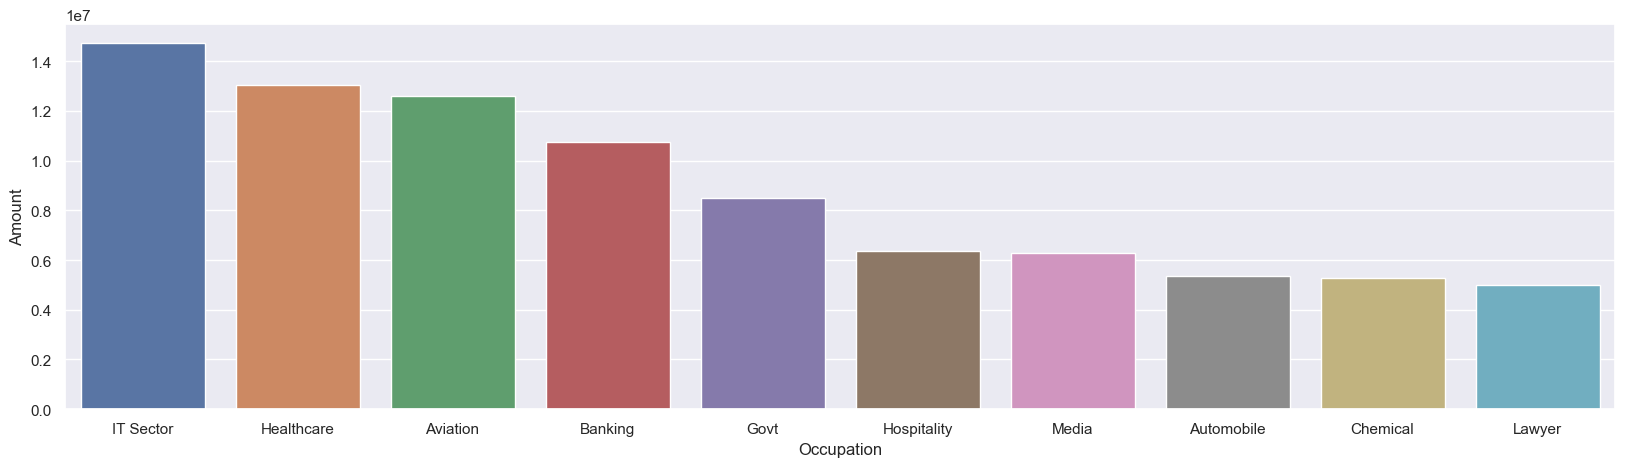

In [43]:
sales_state = df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)   
sns.set(rc={'figure.figsize': (20,5)}) 
sns.barplot(data = sales_state, x='Occupation',y ='Amount')

From above graph we see that most of the buyers are from IT sectors, Healthcare and Aviation sector

# Product Category

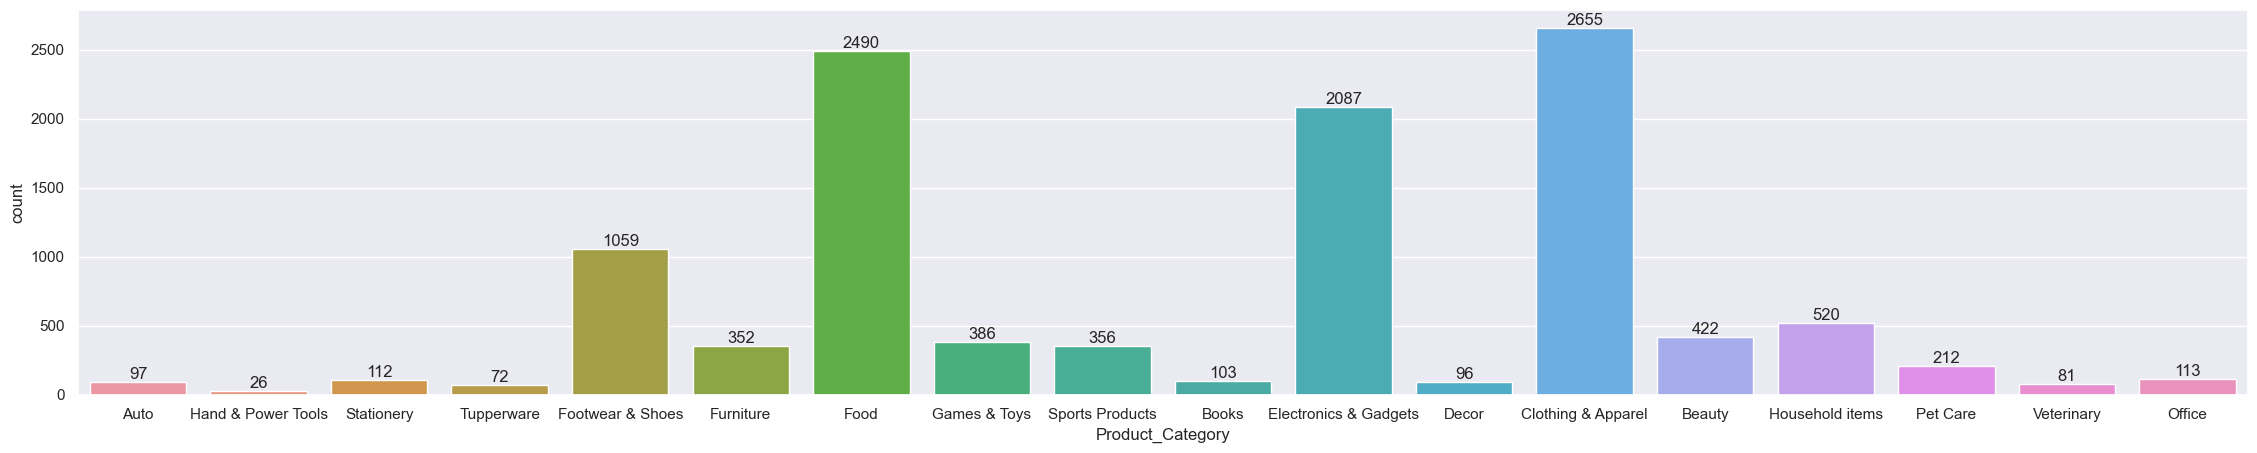

In [47]:
ax = sns.countplot(data=df,x='Product_Category')
sns.set(rc={'figure.figsize': (28,10)}) # it is used to determine width and height of graph
for i in ax.containers:
    
    ax.bar_label(i)

<Axes: xlabel='Product_Category', ylabel='Amount'>

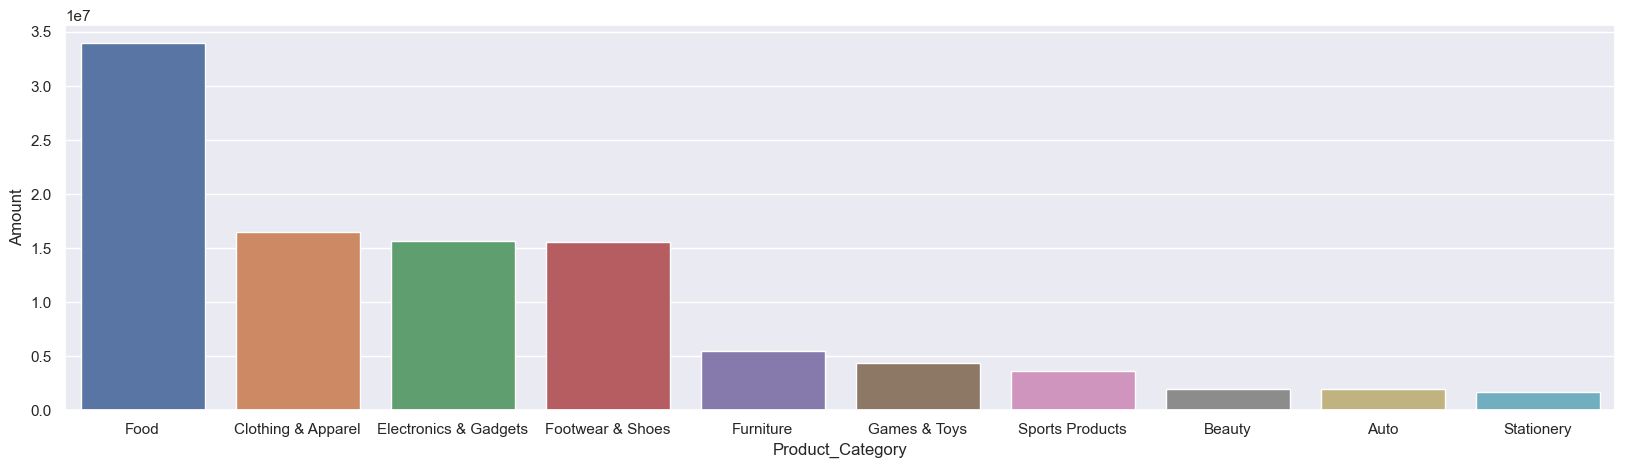

In [57]:
sales_state = df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10) 
sns.set(rc={'figure.figsize': (20,5)}) 
sns.barplot(data = sales_state, x='Product_Category',y ='Amount')

From above grpah we observe that most solds products are Food, CLothing & Apperel and Electronics & Gadgets


<Axes: xlabel='Product_ID', ylabel='Orders'>

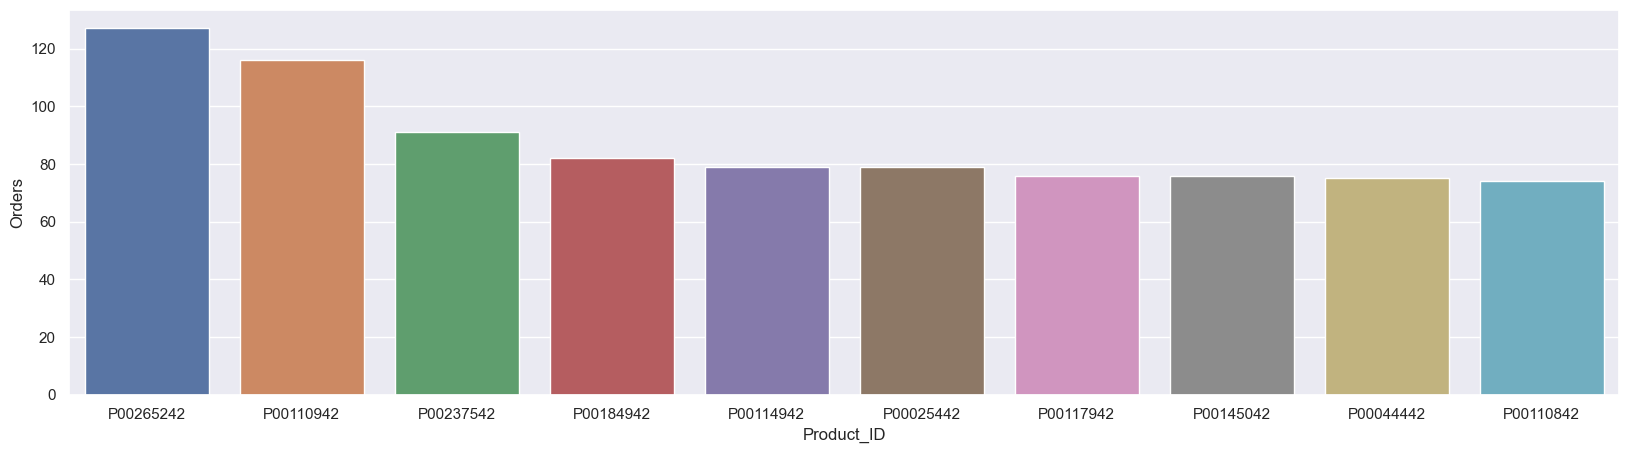

In [60]:
sales_state = df.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)   
sns.set(rc={'figure.figsize': (20,5)}) 
sns.barplot(data = sales_state, x='Product_ID',y ='Orders')

# CONCLUSION

Married women age group 26-35 yrs. from Uttar Pradesh, Maharashtara, and Karnataka working in IT, Healthcare and Aviation are more lokely to buy products from Food, Clothing and Electronics category during Diwali festival

Thank You!!